# 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

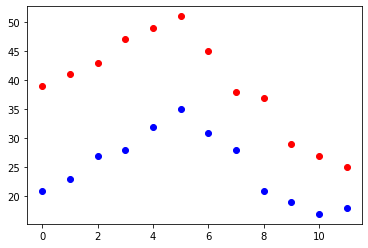

In [2]:
Max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months=np.arange(12)
plt.plot(months,Max,'ro')
plt.plot(months,Min,'bo')

In [3]:
from scipy.optimize import curve_fit
from math import pi as PI

In [4]:
def temps(month,a,b,offset):
    return a+b*np.sin((month+offset)*2*PI/11)
max_params,max_params_cov=curve_fit(temps,months,Max, p0=np.array([2,2,2]))
print(max_params)
min_params,min_params_cov=curve_fit(temps,months,Min, p0=np.array([2,2,2]))
print(min_params)

[ 39.88861733 -10.59083157  -6.91629844]
[25.55626462 -7.74472961 -7.31898706]


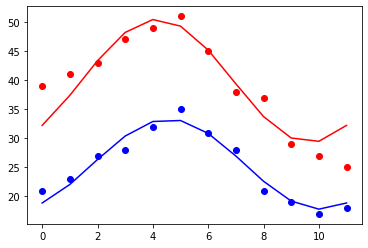

In [5]:
plt.figure()
plt.plot(months,Max,'ro')
plt.plot(months,Min,'bo')
plt.plot(months,temps(months,max_params[0],max_params[1],max_params[2]),'r-')
plt.plot(months,temps(months,min_params[0],min_params[1],min_params[2]),'b-')

# 2.1

In [6]:
import pandas as pd

In [7]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [8]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
x=titanic['sex'].value_counts()
x

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1b8f67f1f40>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male'),
  Text(0.48083667958064136, -0.9893412391939719, 'Female')])

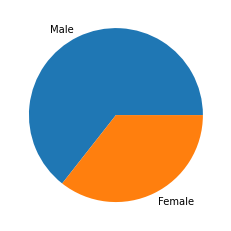

In [10]:
plt.pie(x,labels=['Male','Female'])

# 2.2

In [11]:
titanic['sex'].fillna('unknown',inplace=True,axis=0)

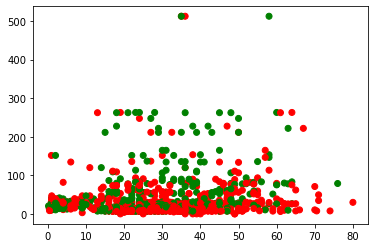

In [12]:
colors = {'male':'red', 'female':'green','unknown':'blue'}
plt.scatter(x='age',y='fare',c=titanic['sex'].map(colors),data=titanic)